<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
#default_exp networkx

In [ ]:
# hide
# %reload_ext autoreload
# %autoreload 2
# %load_ext lab_black

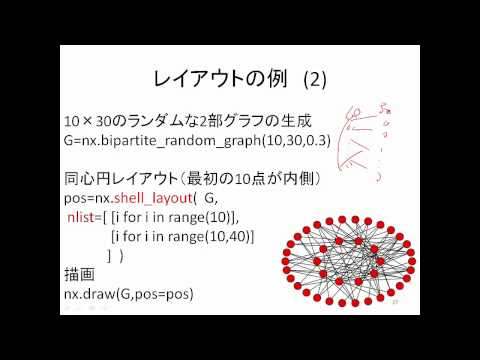

In [ ]:
# hide_input
from IPython.display import Image, YouTubeVideo

YouTubeVideo("YrkfcVlr_bA", width=200, height=150)

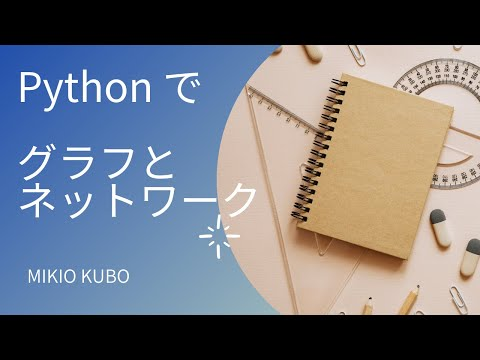

In [ ]:
# hide_input
YouTubeVideo("9XMJVu0Y9LY", width=200, height=150)

NetwrokX https://networkx.org/ はグラフ・ネットワーク解析のためのパッケージである．

ここでは実務で用いる機能を中心に解説する．

- グラフ理論
- グラフの生成と描画
- 点・枝の情報
- 描画の引数とレイアウト
- グラフに対する基本操作
- マッチングとEuler閉路
- 最小木
- 最短路
- フロー問題
- 最大安定集合問題と最大クリーク問題

In [ ]:
import networkx as nx  # networkxパッケージを nx という別名で読み込み
import matplotlib.pyplot as plt  # 描画用パッケージの読み込み

# 図の表示用のマジックコマンド

In [ ]:
# export
import networkx as nx  # networkxパッケージを nx という別名で読み込み
import matplotlib.pyplot as plt  # 描画用パッケージの読み込み

## グラフ理論

グラフ $G=(V,E)$ とは，点集合 $V$ と枝集合 $E$ から構成される概念である．
点集合の要素を**点**(vertex, node)とよび， $u, v (\in V)$ などの記号で表す．
枝集合の要素を**枝**(edge, arc)とよび， $e (\in E)$ と表す．
2点間に複数の枝がない場合には，両端点 $u,v$ を決めれば一意に枝が定まるので，枝を両端にある点の組として $(u,v)$ もしくは $uv$ と表すことができる．

枝に「向き」をつけたグラフを**有向グラフ**(directed graph, digraph)とよび，有向グラフの枝を**有向枝**(directed edge， arc)とよぶ．
一方，通常の（枝に向きをつけない）グラフであることを強調したいときには，グラフを**無向グラフ**(undirected graph)とよぶ．

**ネットワーク**(network)とは，有向グラフに枝上を流れる「もの」（フロー）を付加した概念である．
ネットワーク上の最適化理論は 1950年代にはじまり，その実務的な重要性と理論的な美しさから，急速に発展した分野である．

NetworkXでは，点をnode，枝をedgeとよんでいる．

### グラフの生成法

グラフクラス Graph もしくは有向グラフクラス DiGraph から生成する．


```python
import networkx as nx

G = nx.Graph()     #（無向）グラフ G の生成

D = nx.DiGraph()   #有向グラフ D の生成

```

In [ ]:
G = nx.Graph()  # （無向）グラフ G の生成
G

<networkx.classes.graph.Graph>

### 点と枝の追加方法

- 点の追加

```python
G.add_node(n)
```
で，グラフGに点nを追加する． n は不変オブジェクトなら何でも良い．

- 枝の追加

```python
G.add_edge(u,v)
```
で，グラフGに枝(u,v)を追加する． 枝を追加すると点は自動的に追加される．

In [ ]:
G.add_node("Tokyo")
G.add_edge(1, 2)
print(G)

Graph with 3 nodes and 1 edges


### グラフの情報

G.nodesで点の情報，G.edgesで枝の情報を得ることができる．

In [ ]:
print(G.nodes)
print(G.edges)

['Tokyo', 1, 2]
[(1, 2)]


### 点，枝に属性を付与

```python
G.add_node(n,attr_dict)
```
で，第2引数 attr_dict に任意の属性を名前付き引数として付加することもできる．以下に例を示す．
```python
G.add_node(1)
G.add_node("Tokyo")
G.add_node(5, demand=500)
G.add_node(6, product=["A","F","D"])
```

```python
G.add_edge(u,v,attr_dict)
```
で，第3引数attr_dictに任意の属性を名前付き引数として付加することもできる．以下に例を示す．

```python
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3, weight=7, capacity=15.0)
G.add_edge(1,4, cost=1000)
```

### 一度にたくさん追加

- 複数の点を一度に追加

```python
G.add_nodes_from(L)
```
はリストL内の各要素を点としてグラフGに追加する．引数はリストLのかわりに集合，辞書，文字列，グラフオブジェクトなども可能である．



- 複数の枝を一度に追加

```python
G.add_edges_from(L)
```
は長さ2のタプル(u,v)を要素としたリストL内の要素を枝(u,v)として追加する．
以下に例を示す．

```python
G.add_edges_from([(1,2),(1,3),(2,3),(1,4)]
```

G.add_weighted_edges_from(L)は長さ3のタプル(u,v,w)を要素としたリストL内の要素を，
枝(u,v)ならびに重みを表す属性wとして追加する．重みの属性名の既定値はweightである． 
以下に例を示す．

```python
G.add_weighted_edges_from([("s",1,5),("s",2,8),(2,1,2),(1,"t",8),(2,3,5),(3,"t",6)])
```

## グラフの生成と描画

3点からなる**完全グラフ**(complete graph: すべての点の間に枝がある無向グラフ）を生成して，描画する．

以下の3通りの方法を示す．

*  一番簡単で単純な方法（これが基本）

* forループを使う方法（点の数が増えてきたらこれを使う）

* 関数を使って一発

```python
G=nx.complete_graph(3)
```

描画は**draw**関数を用いる．引数はグラフのインスタンスである．

Jupyter環境で **%matplotlib inline** と宣言している場合にはmatplotlibの描画関数 **plt.show()** は省略できる．

[1, 2, 3]
[(1, 2), (1, 3), (2, 3)]


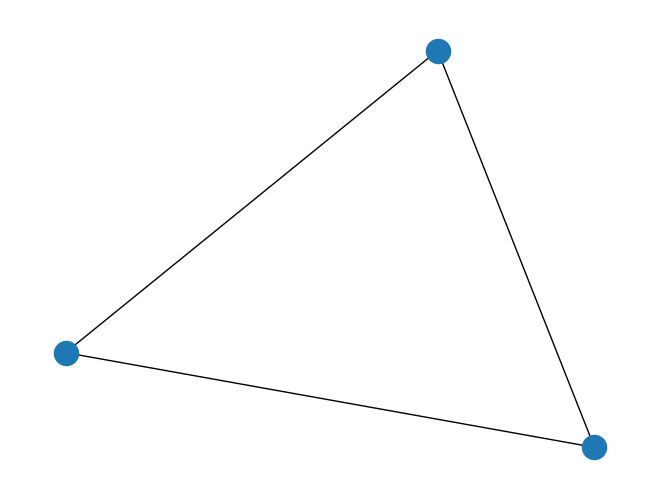

In [ ]:
G = nx.Graph()  # グラフのインスタンスを生成
G.add_edge(1, 2)  # 枝を追加
G.add_edge(1, 3)  # 枝を追加
G.add_edge(2, 3)  # 枝を追加
nx.draw(G)  # グラフを描画
print(G.nodes)
print(G.edges)

In [ ]:
G = nx.Graph()  # グラフのインスタンスを生成
for i in range(3):
    for j in range(3):
        if i < j:  # 無向グラフなので，iより大きいjの場合だけ枝を生成
            G.add_edge(i, j)
# nx.draw(G)

In [ ]:
G = nx.complete_graph(3)  # 完全グラフを生成するcomplete_graph関数を利用
# nx.draw(G)

### pyvisで動くグラフを描画

pyvisパッケージ (https://pyvis.readthedocs.io/en/latest/index.html) を使うと，動かせるグラフを生成できる．

Google Colabの場合は，
```
!pip install pyvis
```
でインストールし， 
```python
from pyvis.network import Network
net = Network()
```
とpyvisのグラフ netを生成する．

Jupyter Notebook (Lab.) の場合には，引数の notebookをTrueにして生成する．
```python
from pyvis.network import Network
net= Network(notebook=True)
```

NetworkXのグラフはfrom_nxメソッドでpyvisのグラフに変換できる．

Google Colabの場合には，その場で描画できないので，生成されたグラフ(graph.html)をダウンロードしてからブラウザで開く．

In [ ]:
from pyvis.network import Network

net = Network(notebook=True)
net.from_nx(G)
net.show("graph.html")  # 画面に出したいときには，この行を生かす

ModuleNotFoundError: No module named 'pyvis'

### 問題（グラフの生成と描画）

* 5点の完全グラフを生成し描画せよ． ここで完全グラフとは，すべての点間に枝がある無向グラフである．

* $3 \times 3$ の格子グラフを生成し，描画せよ． ここで**格子グラフ**(grid graph)とは，2次元平面上に
座標 $(i,j) (i=1,2,\ldots,n; j=1,2,\ldots,m)$ をもつように $n m$個の点を配置し，
座標 $(i,j)$ の各点に対して，右の点 $(i+1,j)$ もしくは上の点  $(i,j+1)$ が存在するなら枝をはることによって得られるグラフであり， grid_2d_graph(n,m)関数で生成できる．

In [ ]:
# export
# G=nx.complete_graph(5)
# nx.draw(G)

In [ ]:
# export
# Grid = nx.grid_2d_graph(3,3)
# nx.draw(Grid)

## 点・枝の情報

ここでは，点と枝に関する情報にアクセスする方法について述べる．


- G.nodesメソッドはグラフGに含まれる点の集合（実際はViewと呼ばれるオブジェクト）を返す．

- G.nodes[n]は点nの属性の情報を辞書として返す．

- for n in GはグラフGの点に対する反復を行う．

In [ ]:
D = nx.DiGraph()
D.add_node("Customer", demand=500)
D.add_node("Plant", product=["A", "F", "D"])
D.add_edge("Plant", "Customer")

print(D.nodes)
print(D.nodes["Customer"], D.nodes["Plant"])
for n in D:
    print(n)

['Customer', 'Plant']
{'demand': 500} {'product': ['A', 'F', 'D']}
Customer
Plant


- G.edgesメソッドはグラフGに含まれるすべての枝の集合（実際はViewと呼ばれるオブジェクト）を返す．

- for e in G.edges() でグラフGの枝に対する反復を行うことができる．

- G.neighbors(u)は点uに隣接する（有向グラフの場合には後続する）点のイテレータを返す．

以下の例では，点 $1$ に隣接する点は $2,3,4$ であり，点 $2$ に隣接する点は $1,3$， 点$3$に隣接する点は$1,2$，
点 $4$ に隣接するのは点 $1$ だけである．

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (1, 4)])
for n in G.neighbors(1):
    print(n)
for n in G:
    print(n, list(G.neighbors(n)))

2
3
4
1 [2, 3, 4]
2 [1, 3]
3 [1, 2]
4 [1]


- G[u]は点uに隣接する点vをキーとし，枝(u,v)に付加された情報を値とした辞書を返す．

以下の例では，点1に隣接する点は2,3,4であり，接続する枝の重みはそれぞれ100,200,50である．

- G[u][v]は枝(u,v)に付加された属性の情報を辞書として返す．

つまり，枝(1,2)の重みは100である．

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 100), (1, 3, 200), (2, 3, 60), (1, 4, 50)])
print(G[1])
print(G[1][2])

{2: {'weight': 100}, 3: {'weight': 200}, 4: {'weight': 50}}
{'weight': 100}


- D.successors(u)は有向グラフDに対する点uの後続点のイテレータを返す．

- D.predecessors(u)は有向グラフDに対する点uの先行点のイテレータを返す．

In [ ]:
for n in D.successors("Plant"):
    print(n)

Customer


### 問題
$3 \times 3$ の格子グラフを生成し，枝の重みをランダムに設定せよ．

In [ ]:
# export
# import random
# Grid = nx.grid_2d_graph(3,3)
# for (u,v) in Grid.edges():
#     Grid[u][v]["weight"] = random.random()

## 描画の引数とレイアウト

関数 **draw** の代表的な引数は以下の通り．

- pos：点をキー，座標（$x,y$のタプル）を値とした辞書を与える．これによって点の座標を指定できる．
省略された場合にはバネ法（後述）によって計算された座標に描画する．

- with_labels：点の名称の表示の有無を指定できる．既定値はFalse．
- nodelist：描画する点のリストを指定できる．
- edgelist：描画する枝のリストを指定できる．
- node_size：描画する点の大きさを指定できる．既定値は $300$．
- node_color：描画する点の色を指定できる．既定値は "r"（赤）．
- width：描画する枝の幅を指定できる．既定値は $1.0$．
- edge_color：描画する枝の色を指定できる．既定値は "k" （黒）．


描画の際の点の位置posを求めるための関数として，以下のものが準備されている．

- spring_layout(G)：隣接する点の間に反発するバネがあると仮定して得られるレイアウト（バネのレイアウト）の座標を返す． これが既定値であるので，引数posを省略して描画した場合には，バネのレイアウトになる．
- circular_layout(G)：点を円上に配置したレイアウト（円上レイアウト）の座標を返す．
- random_layout(G)：点を正方形内にランダムに配置したレイアウト（ランダム・レイアウト）の座標を返す．
- shell_layout(G,nlist)：点を同心円状に配置したレイアウト（同心円レイアウト）の座標を返す． nlistは点のリストのリストであり，各リストは同心円に含まれる点集合を表す．
- spectral_layout(G)：Laplace行列（次数対角行列から隣接行列を減じたもの）の固有値を用いたレイアウト（スペクトル・レイアウト）の座標を返す．
- kamada_kawai_layout(G)：Kamada-Kawaiによる枝の重み（距離）を考慮したレイアウトの座標を返す．

例として円上レイアウトでグラフを描画する．

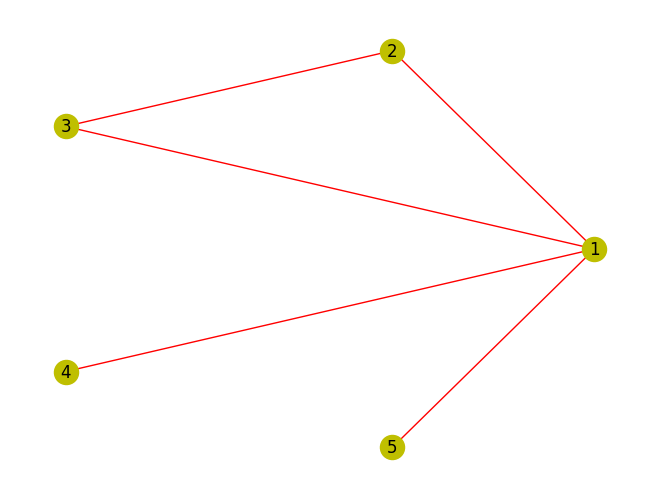

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (1, 4), (1, 5)])
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, edge_color="r", node_color="y", with_labels=True)

In [ ]:
# hide
# net.barnes_hut()
# net.force_atlas_2based()
# net.hrepulsion()
# net.repulsion()

In [ ]:
# hide
# net= Network(notebook=True)
# net.from_nx(G)
# net.show("graph.html")

### 問題 

以下のグラフ生成から好きなものを3つ生成し，描画せよ．

```python
G = nx.cycle_graph(6)
G = nx.balanced_tree(2, 2)
G = nx.complete_graph(5)
G = nx.complete_bipartite_graph(3, 3)
G = nx.grid_2d_graph(3, 3)
G = nx.hypercube_graph(4)
G = nx.chvatal_graph()
G = nx.cubical_graph()
G = nx.octahedral_graph()
G = nx.dodecahedral_graph()
G = nx.icosahedral_graph()
G = nx.petersen_graph()
G = nx.truncated_cube_graph()
G = nx.truncated_tetrahedron_graph()
G = nx.tutte_graph()
G = nx.fast_gnp_random_graph(30, 0.1)
G = nx.random_geometric_graph(10, 0.2)
G = nx.bipartite.random_graph(10, 30, 0.3)
G = nx.bipartite.gnmk_random_graph(10, 30, 50)
```

また， 各グラフを、円上レイアウト， バネのレイアウト， スペクトル・レイアウトのいずれかを1つずつ選び、描画せよ．

In [ ]:
# export
# G=nx.cycle_graph(6)
# pos=nx.spring_layout(G)
# nx.draw(G,pos=pos,node_size=1000,with_labels=True,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.balanced_tree(2,2)
# pos=nx.spring_layout(G)
# nx.draw(G,pos=pos,node_size=1000,with_labels=True,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.complete_graph(5)
# pos=nx.circular_layout(G)
# nx.draw(G,pos=pos,node_size=1000,with_labels=True,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.hypercube_graph(4)
# pos=nx.spring_layout(G)
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.chvatal_graph()
# pos=nx.spring_layout(G)
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.cubical_graph()
# pos=nx.spring_layout(G)
# nx.draw(G,pos=pos,node_size=1000,with_labels=True,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.octahedral_graph()
# #pos=nx.spring_layout(G)
# pos=nx.spectral_layout(G)
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.dodecahedral_graph()
# pos=nx.spring_layout(G)
# #pos=nx.spectral_layout(G)
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.icosahedral_graph()
# #pos=nx.spring_layout(G)
# pos=nx.spectral_layout(G)
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.petersen_graph()
# pos=nx.spring_layout(G)
# #pos=nx.spectral_layout(G)
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.truncated_cube_graph()
# #pos=nx.spring_layout(G)
# pos=nx.spectral_layout(G)
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.truncated_tetrahedron_graph()
# pos=nx.spring_layout(G)
# ###pos=nx.spectral_layout(G)
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.tutte_graph()
# #pos=nx.spring_layout(G)
# pos=nx.spectral_layout(G)
# #pos=nx.shell_layout(G,[nodes[5:10],nodes[0:5]])
# nx.draw(G,pos=pos,node_size=100,with_labels=False,node_color="w",edge_color="g",width=5)

In [ ]:
# export
# G=nx.fast_gnp_random_graph(30,0.1)
# #G=nx.gnm_random_graph(10,18)
# #G=nx.random_regular_graph(3,10)
# nx.draw(G)

In [ ]:
# export
# G=nx.random_geometric_graph(100,0.2)
# pos=nx.get_node_attributes(G,'pos')
# nx.draw(G,pos=pos)

## グラフに対する基本操作

ここではグラフに対する基本的な操作を紹介する．

-  complement(G): **補グラフ**(complement)を返す． ここで補グラフ $G=(V,E)$ のとは，点集合 $V$ をもち，$(u,v) \not\in E$ のときに $u,v$ 間に枝をはったグラフである．

-  reverse(G): 有向グラフの枝を逆にしたものを返す．

[(1, 2), (1, 3), (2, 3)]


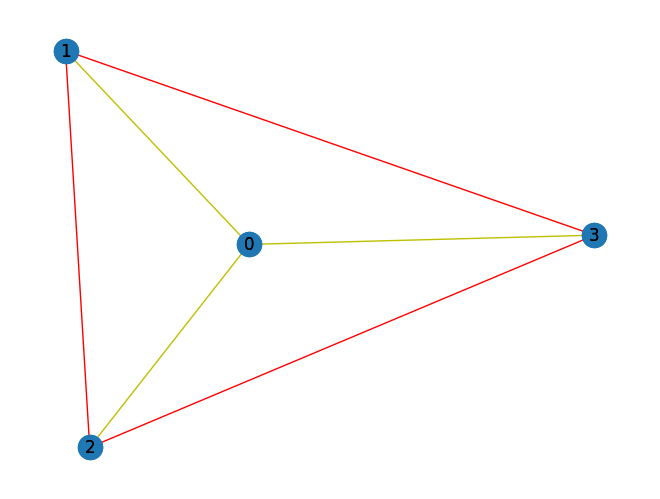

In [ ]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (0, 3)])
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, edge_color="y", with_labels=True)

C = nx.complement(G)
print(C.edges())
nx.draw(C, pos=pos, edge_color="r", with_labels=True)

-  compose(G, H): GとHの**和グラフ**(union graph)を返す．ただしGとHに共通部分があってもよい． 
ここで$G=(V_1,E_1)$ と $H=(V_2,E_2)$ の和グラフとは， 点集合 $V_1 \cup V_2$ と枝集合 $E_1 \cup E_2$ をもつグラフである．

-  union(G, H): グラフGとHの和グラフを返す． ただしGとHに共通部分があってはいけない（もし，共通部分があった場合には例外を返す）．

-  intersection(G, H): 同じ点集合をもつグラフGとHに対して，両方に含まれている枝から成るグラフ（**交差グラフ**）を返す．

-  difference(G, H): 同じ点集合をもつグラフGとHに対して，Gには含まれているがHには含まれていない枝から成るグラフ（**差グラフ**）を返す．

-  symmetric_difference(G, H): 同じ点集合をもつグラフGとHに対して，GまたはHに含まれており，かつ両者に含まれていない枝から成るグラフ（**対称差グラフ**）を返す．

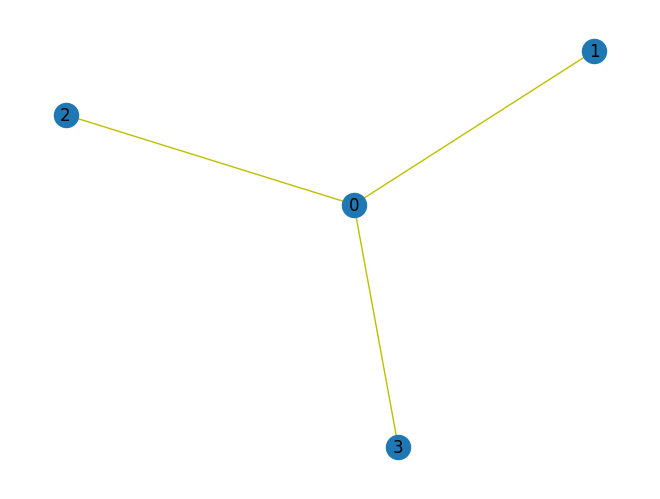

In [ ]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (0, 3)])
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, edge_color="y", with_labels=True)

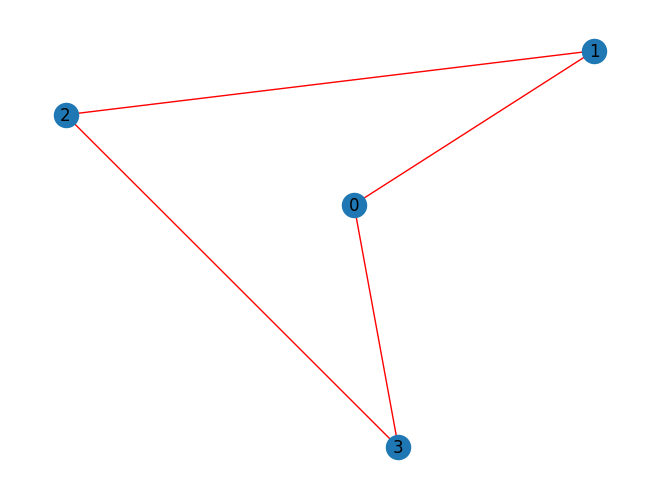

In [ ]:
H = nx.cycle_graph(4)
nx.draw(H, pos=pos, edge_color="r", with_labels=True)

[(0, 2), (1, 2), (2, 3)]


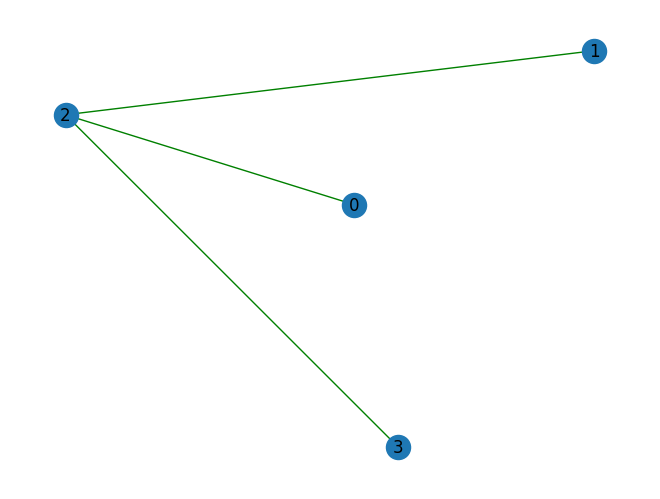

In [ ]:
# C = nx.compose(G,H)
# C = nx.union(G,H)
# C = nx.intersection(G,H)
# C = nx.difference(G,H)
# C = nx.difference(H,G)
C = nx.symmetric_difference(G, H)
print(C.edges())
nx.draw(C, pos=pos, edge_color="g", with_labels=True)

-  cartesian_product(G, H): グラフGとHに対する**直積**(Cartesian product)グラフを返す．
ここで，グラフ $G=(V_1,E_1)$ と $H=(V_2,E_2)$ の直積グラフとは，
点集合 $V_1 \times V_2 = \{ (v_1,v_2) | v_1 \in V_1, v_2 \in V_2 \}$ （点集合 $V_1,V_2$ の直積）と，
以下を満たす枝集合から構成されるグラフである．

直積グラフの枝 $((u,x),(v,y))$ が存在 $\Leftrightarrow$
 「$x=y$ かつ $(u,v) \in E_1$」もしくは「$u=v$ かつ $(x,y) \in E_2$」
 
- lexicographic_product(G, H): グラフGとHに対する**辞書的積**(lexicographic product)グラフを返す．
ここで，グラフ $G=(V_1,E_1)$ と $H=(V_2,E_2)$ の辞書的積グラフとは，
点集合 $V_1 \times V_2$ と，
以下を満たす枝集合から構成されるグラフである．

辞書的積グラフの枝 $((u,x),(v,y))$ が存在 $\Leftrightarrow$
 「$(u,v) \in E_1$」もしくは「$u=v$ かつ $(x,y) \in E_2$」

- tensor_product(G, H): グラフGとHに対する**テンソル積**(tensor product)グラフを返す．
ここで，グラフ $G=(V_1,E_1)$ と $H=(V_2,E_2)$ のテンソル積グラフとは，
点集合 $V_1 \times V_2$ と，
以下を満たす枝集合から構成されるグラフである．

テンソル積グラフの枝 $((u,x),(v,y))$ が存在 $\Leftrightarrow$
「$(u,v) \in E_1$ かつ $(x,y) \in E_2$」

- strong_product(G, H): グラフGとHに対する**強積**(strong product)グラフを返す．
ここで，グラフ $G=(V_1,E_1)$ と $H=(V_2,E_2)$ の強積グラフとは，
点集合 $V_1 \times V_2$ と，
以下を満たす枝集合から構成されるグラフである．

強積グラフの枝 $((u,x),(v,y))$ が存在 $\Leftrightarrow$
「$((u,x),(v,y))$ が直積グラフの枝もしくはテンソル積グラフの枝」

以下の例では，グラフ $G$ が商品 $0,1,2$ の関連， グラフ $H$ が店舗 $A,B,C$ 間の競合を表すものとする．

直積グラフの点は，各店舗で売られている各商品を表しており，
同じ店で販売されている関連する商品，もしくは競合する店で販売されている同じ商品に
対して枝がはられていると解釈できる．

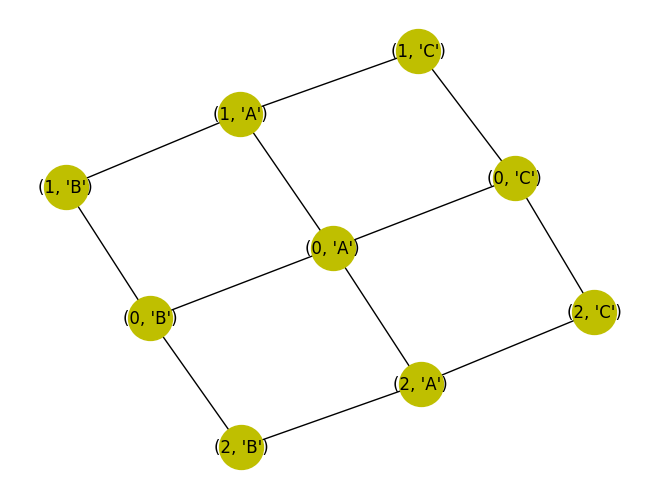

In [ ]:
G = nx.Graph()
H = nx.Graph()
G.add_edges_from([(0, 1), (0, 2)])
H.add_edges_from([("A", "B"), ("A", "C")])
Product = nx.cartesian_product(G, H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

### 問題

上の例題に対して辞書的積， テンソル積， 強積を計算し，描画せよ． それぞれ，どのような意味を持つか考察せよ．

In [ ]:
# export
# G=nx.Graph()
# G.add_edges_from([(0,1),(1,2)])
# H=nx.Graph()
# H.add_edges_from([('A','B'),('A','C')])
# #Product = nx.cartesian_product(G,H)
# #Product = nx.lexicographic_product(G,H)
# #Product = nx.tensor_product(G,H)
# Product = nx.strong_product(G,H)

# pos={}
# for i in range(3):
#     for j,item in enumerate(["B","A","C"]):
#         pos[(i,item)]=(i,j)

# #nx.draw(Product,with_labels=True)
# nx.draw(Product,with_labels=True,pos=pos,
#         node_color="w",node_size=1500,edge_color="g",width=3)

#hide
### 問題　（難）

3つの工場 $0,1,2$ で自動車を生産することを考える．
工場 $0,1$ は部品工場であり，そこでは部品 $P1, P2, P3$ を製造している．
工場 $2$ は組み立て工場であり，そこでは部品を組み立てて完成品 $P4, P5$ を製造している．

部品と完成品の関係は，部品展開表とよばれるグラフによって与えられており，
$P4$ を製造するためには，部品 $P1, P2$ が1つずつ必要であり，
$P5$ を製造するためには，部品 $P2, P3$ が1つずつ必要であるものとする．
工場 $0$ から工場 $2$ への輸送と，工場 $1$ から工場 $2$ への輸送を表すグラフと，部品展開表を表すグラフの
テンソル積をとることによって，各工場における製品の製造を点，可能な輸送経路を枝としたグラフを生成せよ．

## マッチングとEuler閉路

以下のサイト（もしく本）を参照されたい．

-  マッチング： Pythonによる実務で役立つ最適化問題100+ (2) ―割当・施設配置・在庫最適化・巡回セールスマン― 13章

https://scmopt.github.io/opt100/30matching.html

- Euler閉路： Pythonによる実務で役立つ最適化問題100+ (3) ―配送計画・パッキング・スケジューリング― 24章

https://scmopt.github.io/opt100/64euler.html

### 問題（マッチングとEuler閉路）

以下のグラフは奇数の次数をもつ点があるので，Euler閉路（すべての枝をちょうど1回通過する閉路：すべての点の次数が偶数であるのが，Euler閉路をもつための必要十分条件である）をもたない．
奇数の次数をもつ点集合に対して，点間の最短距離を計算し，最小距離のマッチング（点の次数が1以下の部分グラフ)を求めよ．
マッチングに含まれる枝をもとのグラフに加えるとEuler閉路をもつようになる（なぜか？理由を考えよ）．
マッチングを加えたグラフに対するEuler閉路を求めよ．

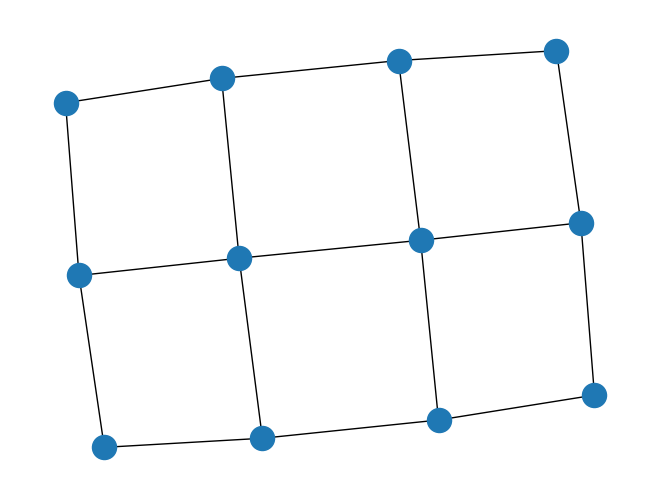

In [ ]:
G = nx.grid_2d_graph(3, 4)
nx.draw(G)

In [ ]:
# export
# G = nx.grid_2d_graph(3,4)
# NewG = nx.eulerize(G)
# for (u,v) in nx.eulerian_circuit(NewG):
#     print(u,v)

## 最小木

最小木問題については，以下のサイト（もしく本）を参照されたい．

- Pythonによる実務で役立つ最適化問題100+ (1) ―グラフ理論と組合せ最適化への招待― 第４章

https://scmopt.github.io/opt100/05mst.html

### 問題（最小木）

1. $5 \times 5$ の格子グラフ（枝の重みはすべて $1$）の最小木（枝の重みの合計が最小の閉路を含まない連結グラフ）を求めよ．

2. $5 \times 5$ の格子グラフの枝の重みをランダムに設定した上で，最小木を求め，最小木に含まれる枝を異なる色で描画せよ．

3. 枝上に距離が定義された無向グラフ $G=(V,E)$ を考える． このグラフの点集合 $V$ を $k$個に分割したとき，分割に含まれる点同士の最短距離を最大化するようにしたい．これは最小木に含まれる枝を距離の大きい順に $k-1$ 本除くことによって得ることができる． ランダムに距離を設定した $5 \times 5$ の格子グラフに対して $k=5$ の分割を求めよ．

In [ ]:
# export
# G = nx.grid_2d_graph(5,5)
# print(list(nx.minimum_spanning_edges(G)))

# m, n = 5, 5
# lb, ub = 1, 20
# G = nx.grid_2d_graph(m, n)
# for (i,j) in G.edges():
#     G[i][j]["weight"] = random.randint(lb, ub)
# pos ={(i,j):(i,j) for (i,j) in G.nodes() }
# edges = list(nx.minimum_spanning_edges(G))
# plt.figure()
# nx.draw(G, pos=pos, node_size=100)
# edge_labels ={}
# for (i,j) in G.edges():
#     edge_labels[i,j] = f"{ G[i][j]['weight'] }"
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
# nx.draw(G, pos=pos, width=5, edgelist= edges, edge_color ="orange")
# plt.show()

# weight =[ ]
# for (i,j,w) in edges:
#     weight.append( (w["weight"], i,j) )
# weight.sort(reverse=True)
# G1 = nx.Graph()
# for (w,i,j) in weight[5:]:
#     G1.add_edge(i,j)
# nx.draw(G, pos=pos, node_size=100)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
# nx.draw(G1, pos=pos, node_size=100, width=10, edge_color="orange")

## 最短路

最短路問題の詳細については，以下のサイト（もしくは本）を参照されたい．

- Pythonによる実務で役立つ最適化問題100+ (1) ―グラフ理論と組合せ最適化への招待― 第2章

https://scmopt.github.io/opt100/03sp.html

簡単な通勤（通学）の例を示そう．

八千代緑が丘から越中島までの電車による経路を求めたい．
枝ごとの移動時間と移動費用を入力して，最短時間パスと最小費用パスを求めよ．
乗り換えの待ち時間は無視してよいが，徒歩の時間は考慮せよ．


In [ ]:
G = nx.Graph()
G.add_edge("八千代緑が丘", "西船橋", weight=15, cost=490)
G.add_edge("西船橋", "門前仲町", weight=20, cost=230)
G.add_edge("門前仲町", "越中島", weight=10, cost=0)
G.add_edge("西船橋", "越中島", weight=24, cost=380)

path = nx.dijkstra_path(G, "八千代緑が丘", "越中島")
print("最短時間パス", path)

path = nx.dijkstra_path(G, "八千代緑が丘", "越中島", weight="cost")
print("最小費用パス", path)

最短時間パス ['八千代緑が丘', '西船橋', '越中島']
最小費用パス ['八千代緑が丘', '西船橋', '門前仲町', '越中島']


### 問題

自宅から大学（もしくは職場）までの最短時間と最小費用のパスを求めるためのネットワークを作成し，最短時間パスと最小費用パスを求めよ． 
ただし大学（職場）から徒歩圏の場合は，親戚の家からのパスを求めよ．

In [ ]:
# export
# G = nx.Graph()
# G.add_edge("八千代緑が丘", "西船橋", weight=15, cost=490)
# G.add_edge("西船橋", "門前仲町", weight=20, cost=230)
# G.add_edge("門前仲町", "越中島", weight=10, cost=0)
# G.add_edge("西船橋", "越中島", weight=24, cost=380)

# path = nx.dijkstra_path(G, "八千代緑が丘", "越中島")
# print("最短時間パス", path)

# path = nx.dijkstra_path(G, "八千代緑が丘", "越中島", weight="cost")
# print("最小費用パス", path)

### 問題

$3\times 3$ の格子グラフを生成するプログラムを作成し，枝の重みをランダムに設定した上で，
左上の点から右下の点までの最短路を求め，最短路を異なる色で描画せよ．

In [ ]:
# export
# m, n = 3, 3
# lb, ub = 1, 300
# G = nx.grid_2d_graph(m, n)
# for (i,j) in G.edges():
#     G[i][j]["weight"] = random.randint(lb, ub)
# path = nx.dijkstra_path(G, source=(0,0), target=(2,2))
# edges =[]
# for i in range(len(path)-1):
#     edges.append( (path[i],path[i+1]) )
# plt.figure()
# nx.draw(G, pos=pos, node_size=100)
# edge_labels ={}
# for (i,j) in G.edges():
#     edge_labels[i,j] = f"{ G[i][j]['weight'] }"
# nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
# nx.draw(G, pos=pos, width=5, edgelist= edges, edge_color ="orange")
# plt.show()

### 問題 (PERT)

あなたは航空機会社のコンサルタントだ．あなたの仕事は，着陸した航空機をなるべく早く離陸させるためのスケジュールをたてることだ．
航空機は，再び離陸する前に幾つかの作業をこなさなければならない．
まず，乗客と荷物を降ろし，次に機内の掃除をし，最後に新しい乗客を搭乗させ，新しい荷物を積み込む．
当然のことであるが，
乗客を降ろす前に掃除はできず，掃除をした後でないと新しい乗客を入れることはできず，
荷物をすべて降ろし終わった後でないと，新しい荷物は積み込むことができない．
また，この航空機会社では，
乗客用のゲートの都合で，荷物を降ろし終わった後でないと新しい乗客を搭乗させることができないのだ．

作業時間は，乗客降ろし $13$ 分，荷物降ろし $25$ 分，機内清掃 $15$ 分，新しい乗客の搭乗 $27$ 分，
新しい荷物積み込み $22$ 分とする．
さて，最短で何分で離陸できるだろうか？
（ヒント： 最短離陸時間を出すにはグラフの最長路を求める必要がある． 枝の重みを負にして最短路を解けば良い． 
枝の重みが負なので， Dijkstra法でなくBellman-Ford法を使う）

In [ ]:
# export
# duration = {1: 13, 2: 25, 3: 15, 4: 27, 5: 22}
# G = nx.DiGraph()
# G.add_weighted_edges_from([(0,1,-13),(1,2,-15),(2,3,-27),(0,4,-25),(4,2,0),(4,3,-22)])
# pred, distance = nx.bellman_ford_predecessor_and_distance(G,source=0)
# distance

#hide
### 問題 （難）

Dijkstra法を自分で実装せよ．

NetworkXパッケージのDijkstra法と自分で作成したDijkstra法を大規模な格子グラフで実験し，計算時間を比較せよ．

## フロー問題

以下のサイト（もしく本）を参照されたい．

- 最大流問題： Pythonによる実務で役立つ最適化問題100+ (1) ―グラフ理論と組合せ最適化への招待― 第8章

https://scmopt.github.io/opt100/10maxflow.html

- 割当問題： Pythonによる実務で役立つ最適化問題100+ (2) ―割当・施設配置・在庫最適化・巡回セールスマン― 14章

https://scmopt.github.io/opt100/33ap.html

- 最小費用流問題： Pythonによる実務で役立つ最適化問題100+ (1) ―グラフ理論と組合せ最適化への招待― 第7章

https://scmopt.github.io/opt100/09mcf.html

### 例題：最大流問題

ランダムな2部グラフを作成し，最大マッチングを**最大流問題**(maximum flow problem)を解くことによって求めよ．

ここで最大流問題とは，以下に定義される問題である．

$n$ 個の点から構成される点集合 $V$ および $m$ 本の枝から構成される枝集合 $E$， 有向グラフ $G=(V,E)$，
枝上に定義される非負の容量関数 $C: E \rightarrow R_+$，
始点 $s \in V$ および終点 $t \in V$ が与えられたとき，
始点 $s$ から終点 $t$ までの「フロー」で，
その量が最大になるものを求めよ．

ここで**フロー**(flow)とは枝上に定義された実数値関数 $x: E \rightarrow R$ で，
以下の性質を満たすものを指す．

- フロー整合条件:
$$
 \sum_{v: vu \in E} x_{vu} - \sum_{v: uv \in E} x_{uv} =0  \ \ \ \forall u \in V \setminus \{s,t\} 
$$

- 容量制約と非負制約: 
$$
  0 \leq x_{e} \leq C_{e} \ \ \  \forall e \in E
$$

ダミーの始点と終点を追加することによって，最大流問題に帰着する．

In [ ]:
# ランダムな２部グラフの生成例
BG = nx.bipartite.random_graph(10, 5, 0.5)
top = nx.bipartite.sets(BG)[0]
other = nx.bipartite.sets(BG)[1]
pos = nx.bipartite_layout(BG, top)
nx.draw(BG, pos=pos)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(["source","sink"])
G.add_edges_from([ ("source",j) for j in top])
G.add_edges_from([ (i, "sink") for i in other])
G.add_edges_from(BG.edges())
for (i,j) in G.edges():
    G[i][j]["capacity"] = 1
value, flow = nx.maximum_flow(G, _s="source", _t="sink")
print("value=",value)
print(flow)

NameError: name 'top' is not defined

### 例題： 割当問題

4人の作業員 A,B,C,D を4つの仕事 $0,1,2,3$ を1つずつ割り当てることを考える．
作業員が仕事を割り当てられたときにかかる費用が，以下のようになっているとき，最小費用の割当を求めよ．

$$
\begin{array}{ l    l l l l} 
       & 0 & 1 & 2    &3    \\ \hline
A      & 25 & 20 & 30 & 27  \\
B      & 17 & 15 & 12 & 16  \\
C      & 25 & 21 & 23 & 19  \\ 
D      & 16 & 26 & 21 & 22  
\end{array}
$$

この問題は，**最小費用流問題**(minimum cost flow problem)に帰着できる．

最小費用流問題は，以下のように定義される問題である．

有向グラフ $G=(V,E)$，
枝上に定義される重み（費用）関数 $w: E \rightarrow R$，
枝上に定義される非負の容量関数 $C: E \rightarrow R_+ \cup \{ \infty \} $，
点上に定義される流出量関数 $b: V \rightarrow R$ が与えられたとき，
「実行可能フロー」で，費用の合計が最小になるものを求めよ．
ただし，$\sum_{v \in V} b_v =0$ を満たすものとする．

作業員を表す点から仕事を表す点へ $1$ 単位のフローを最小費用で流すことによって求解する．

In [ ]:
cost = [[25,20,30,27],
        [17,15,12,16],
        [25,21,23,19],
        [16,26,21,22]]
G = nx.DiGraph()
n = len(cost)
for i in range(n):
    G.add_node(i, demand=-1)
    G.add_node(n+i, demand=1)
G.add_weighted_edges_from([(i,n+j,cost[i][j]) for i in range(n) for j in range(n)])
val, flow = nx.algorithms.flow.network_simplex(G)
print(val,flow)

67 {0: {4: 0, 5: 1, 6: 0, 7: 0}, 4: {}, 1: {4: 0, 5: 0, 6: 1, 7: 0}, 5: {}, 2: {4: 0, 5: 0, 6: 0, 7: 1}, 6: {}, 3: {4: 1, 5: 0, 6: 0, 7: 0}, 7: {}}


### 問題（輸送問題）

あなたは，スポーツ用品販売チェインのオーナーだ．
あなたは，店舗展開をしている5つの顧客
（需要地点）に対して，
3つの自社工場で生産した製品を運ぶ必要がある．
調査の結果，
工場での生産可能量（容量），
顧客への輸送費用，ならびに各顧客における需要量は，
以下のようになっていることが分かった．
さて，どのような輸送経路を選択すれば，総費用が最小になるであろうか？


顧客の需要量，工場から顧客までの輸送費用，ならびに工場の生産容量：
$$
\begin{array}{c  c c c c c   c  } \hline
顧客 & 1  &  2  & 3  & 4 & 5 &  \\  \hline
需要量   &80 & 270 & 250 & 160 & 180 &   \\ \hline 
工場  &   輸送費用  &   &    &    &  & 容量  \\ \hline
1      & 4 & 5 & 6 & 8 & 10 &  500 \\
2      & 6  &4 & 3 & 5 & 8 &  500 \\
3      & 9  & 7 & 4 & 3 & 4 &  500 \\ \hline
\end{array}
$$

（ヒント： 最小費用流問題においては，需要（供給は負の需要とみなす）の合計が $0$ でなくてはいけない． 仮想の点を追加することによって，最小費用流問題に帰着せよ）

In [ ]:
# export
# d = {1:80, 2:270, 3:250 , 4:160, 5:180} # demand
# M = {1:500, 2:500, 3:500}              # capacity
# c = {(1,1):4,    (1,2):6,    (1,3):9,  # cost
#      (2,1):5,    (2,2):4,    (2,3):7,
#      (3,1):6,    (3,2):3,    (3,3):4,
#      (4,1):8,    (4,2):5,    (4,3):3,
#      (5,1):10,   (5,2):8,    (5,3):4,
#      }
# G = nx.DiGraph()
# for i in M:
#     G.add_node(f"plant{i}", demand=-M[i])
# for j in d:
#     G.add_node(f"customer{j}", demand=d[j])
# total_demand = sum(d[j] for j in d)
# total_supply = sum(M[i] for i in M)
# G.add_node("dummy", demand = total_supply-total_demand)
# G.add_weighted_edges_from([(f"plant{i}",f"customer{j}",c[j,i]) for i in M for j in d] )
# G.add_weighted_edges_from([ (f"plant{i}","dummy",0) for i in M] )
# val, flow = nx.algorithms.flow.network_simplex(G)
# print(val,flow)

### 問題（多期間生産計画問題）

1つの製品の生産をしている工場を考える．
在庫費用は1日あたり，1トンあたり1万円とする．
いま7日先までの需要が分かっていて，7日分の生産量と在庫量を決定したい．
各日の需要は，以下の表のようになっている．
工場の1日の稼働時間は $8$時間，製品1トンあたりの製造時間は$1$時間としたとき，
稼働時間上限を満たした最小費用の生産・在庫量を決定せよ．


|  日         |  1 | 2 | 3 | 4 | 5 | 6 | 7  |
|---          |---|---|---|---|---|---|--- |
| 需要量       |  5 | 7 | 8 | 2 | 9 | 1 | 3  |

In [ ]:
# export
demand = [5, 7, 8, 2, 9, 1, 3]  # 需要量
T = len(demand)  # 計画期間
h = 1  # 在庫費用
capacity = 8  # 最大稼働時間(=最大生産量；製造時間=1だから)
G = nx.DiGraph()
for i in range(T):
    G.add_node(f"period{i}", demand=demand[i])
G.add_node("dummy", demand=-sum(demand))
G.add_weighted_edges_from([("dummy", f"period{i}", 0) for i in range(T)])
G.add_weighted_edges_from([(f"period{i}", f"period{i+1}", h) for i in range(T - 1)])
for i in range(T):
    G["dummy"][f"period{i}"]["capacity"] = capacity
for i in range(T - 1):
    G[f"period{i}"][f"period{i+1}"]["capacity"] = sum(demand)
val, flow = nx.algorithms.flow.network_simplex(G)
print(val, flow)

1 {'period0': {'period1': 0}, 'period1': {'period2': 0}, 'period2': {'period3': 0}, 'period3': {'period4': 1}, 'period4': {'period5': 0}, 'period5': {'period6': 0}, 'period6': {}, 'dummy': {'period0': 5, 'period1': 7, 'period2': 8, 'period3': 3, 'period4': 8, 'period5': 1, 'period6': 3}}


### 問題（下限制約）

以下の図に示す最小費用流問題を考える．枝上の数値は「単位フローあたりの費用(容量)」であり，点 $0$ から点 $4$ に $10$ 単位のものを最小費用で流したい．

ただし，点2から点3へ向かう枝のフロー量が $4$以上でなければならないものとする．

このフロー量の下限制約を取り除くことを考える．
下限 $4$ を超過した量を新たなフロー量として $x'_{23}$ と記す．元のフロー量 $x_{23}$ とは $x_{23}= 4+x'_{23}$ の関係がある．
変数 $x_{23}$ を $x'_{23}$ に置き換えることによって，
点2におけるフロー整合条件から点2の需要量は $4$ 増え，
点3におけるフロー整合条件から点3の需要量は $4$減る．
また，枝$(2,3)$ の容量（フロー量上限）は，$1(=5-4)$に変更される．

この観察を用いて，下限制約付きの最小費用流を求めよ．

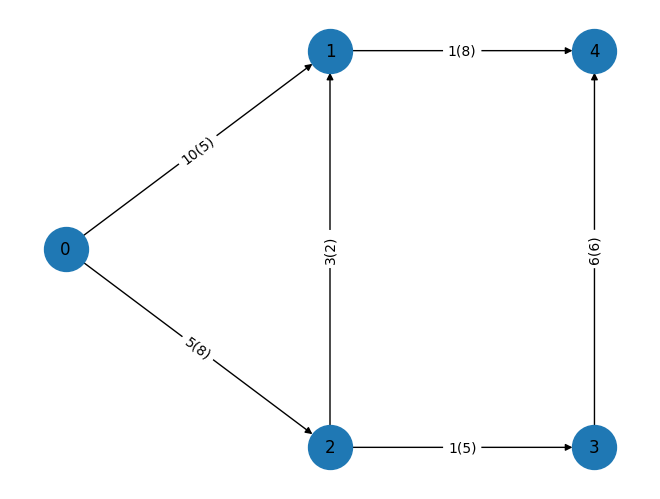

In [ ]:
#export
G = nx.DiGraph()
G.add_node(0, demand=-10)
G.add_node(4, demand=10)
capacity = {(0, 1): 5, (0, 2): 8, (1, 4): 8, (2, 1): 2, (2, 3): 5, (3, 4): 6}
G.add_weighted_edges_from(
    [(0, 1, 10), (0, 2, 5), (1, 4, 1), (2, 1, 3), (2, 3, 1), (3, 4, 6)]
)
for (i, j) in G.edges():
    G[i][j]["capacity"] = capacity[i, j]
pos = {0: (0, 1), 1: (1, 2), 2: (1, 0), 3: (2, 0), 4: (2, 2)}
edge_labels = {}
for (i, j) in G.edges():
    edge_labels[i, j] = f"{ G[i][j]['weight'] }({ G[i][j]['capacity']})"
plt.figure()
nx.draw(G, pos=pos, with_labels=True, node_size=1000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

### 問題（ナプキンのクリーニング） （難）

あなたはホテルの宴会係だ．あなたは1週間に使用するナプキンを手配する必要がある．
各日の綺麗なナプキンの需要量は平日は $100$枚，土曜日と日曜日は $125$枚だ．
新しいナプキンを購入するには $100$円かかる．
使用したナプキンはクリーニング店で洗濯して綺麗なナプキンにすることができるが，
早いクリーニング店だと1日で1枚あたり $30$円かかり，
遅いクリーニング店だと2日で1枚あたり $10$円かかる．
月曜の朝のナプキンの在庫が $0$ としたとき，需要を満たす最適なナプキンの購入ならびにクリーニング計画をたてよ．


**ヒント：** この問題は下限付きの最小費用流問題に帰着できる．

さらに、上のナプキンのクリーニング問題において，
日曜末の在庫を月曜の朝に使うことができると仮定したときの最適なナプキンのクリーニング計画をたてよ．

In [ ]:
# export
# G=nx.DiGraph()

# Demand=[100,100,100,100,100,125,125]
# U=sum(Demand)
# T=len(Demand)
# G.add_edge("t","s")
# for t in range(T):
#     G.add_node(("clean",t),demand=Demand[t])
#     G.add_node(("dirty",t),demand=-Demand[t])
#     G.add_edge("s",("clean",t),weight=10)         #buy new napkins
#     G.add_edge(("clean",t),("dirty",t),capacity=U-Demand[t]) #use napkins
#     G.add_edge(("dirty",t),"t")         #discard napkins

# for t in range(T-1):
#     G.add_edge(("clean",t),("clean",t+1)) #invenory of clean napkins
#     G.add_edge(("dirty",t),("clean",t+1),weight=3) #clean using fast laundry

# for t in range(T-2):
#     G.add_edge(("dirty",t),("clean",t+2),weight=1) #clean using slow laundry

# cost,flow = nx.network_simplex(G)

# print("cost=",cost)
# for i in G.nodes():
#     for j in flow[i]:
#         if flow[i][j]>0:
#             print(i,j,flow[i][j])

# G=nx.DiGraph()

# Demand=[100,100,100,100,100,125,125]
# U=sum(Demand)
# T=len(Demand)
# G.add_edge("t","s")
# for t in range(T):
#     G.add_node(("clean",t),demand=Demand[t])
#     G.add_node(("dirty",t),demand=-Demand[t])
#     G.add_edge("s",("clean",t),weight=10)         #buy new napkins
#     G.add_edge(("clean",t),("dirty",t),capacity=U-Demand[t]) #use napkins
#     G.add_edge(("dirty",t),"t")         #discard napkins

# for t in range(T):
#     G.add_edge(("clean",t),("clean",(t+1) % T )) #invenory of clean napkins
#     G.add_edge(("dirty",t),("clean", (t+1)% T ),weight=3) #clean using fast laundry

# for t in range(T):
#     G.add_edge(("dirty",t),("clean",(t+2) % T),weight=1) #clean using slow laundry

# cost,flow = nx.network_simplex(G)

# print("cost=",cost)
# for i in G.nodes():
#     for j in flow[i]:
#         if flow[i][j]>0:
#             print(i,j,flow[i][j])

## 最大安定集合問題と最大クリーク問題

**最大安定集合問題**(maximum stable set problem)は，以下のように定義される問題である．

点数 $n$ の無向グラフ $G=(V,E)$ が与えられたとき，点の部分集合 $S (\subseteq V)$ は，
すべての $S$ 内の点の間に枝がないとき**安定集合**（stable set）とよばれる．
最大安定集合問題とは，集合に含まれる要素数（位数）$|S|$ が最大になる安定集合 $S$ を求める問題である.

この問題のグラフの補グラフ（枝の有無を反転させたグラフ）を考えると，
以下に定義される**最大クリーク問題**（maximum clique problem）になる．

無向グラフ $G=(V,E)$ が与えられたとき，点の部分集合 $C (\subseteq V)$は，
$C$ によって導かれた誘導部分グラフが完全グラフになるとき**クリーク**（clique）とよばれる
（完全グラフとは，すべての点の間に枝があるグラフである）．
最大クリーク問題とは，位数 $|C|$ が最大になるクリーク $C$ を求める問題である．


これらの2つの問題は（お互いに簡単な変換によって帰着されるという意味で）同値である．


最大安定集合問題と最大クリーク問題の詳細については，以下のサイト（もしくは本）を参照されたい．

- Pythonによる実務で役立つ最適化問題100+ (1) ―グラフ理論と組合せ最適化への招待― 第11章

https://scmopt.github.io/opt100/18clique.html

### 問題 （$8$-クイーン問題)

$8 \times 8$ のチェス盤に $8$個のクイーンを置くことを考える．
チェスのクイーンとは，将棋の飛車と角の両方の動きができる最強の駒である．
クイーンがお互いに取り合わないように置く配置を1つ求めよ．

将棋を知らない人のために言い換えると，$8 \times 8$ のマス目に，同じ行（列）には高々1つのクイーンを置き，
左下（右下）斜めにも高々1つのクイーンを置くような配置を求める問題である
（ヒント： 実は，この問題は安定集合問題の特殊形である．
グラフは $i$ 行，$j$ 列のマス目を点とみなして，クイーンが取り合うとき点の間に枝をはれば良い）．

ちなみに斜めでクイーンが取り合うかどうかを判定するのは，$i-j$ が同じ（右下の斜め）か $i+j$ が同じか（左下の斜め）で判定すれば良い．

In [ ]:
# export
from networkx.algorithms import approximation

G = nx.Graph()
n = 8  # クイーン数
for i in range(n):
    for j in range(n):
        G.add_node((i, j))
for n1 in G.nodes():
    for n2 in G.nodes():
        if n1 == n2:
            continue
        if n1[0] == n2[0]:
            G.add_edge(n1, n2)
        if n1[1] == n2[1]:
            G.add_edge(n1, n2)
        if n1[0] - n1[1] == n2[0] - n2[1]:
            G.add_edge(n1, n2)
        if n1[0] + n1[1] == n2[0] + n2[1]:
            G.add_edge(n1, n2)
S = approximation.max_clique(nx.complement(G))
print(S)

{(2, 4), (1, 2), (0, 0), (3, 1), (7, 6), (6, 3), (4, 7)}
